### Student Details

Student name: Dylan Rodrigues

Student ID: 24121479

In [157]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [158]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [159]:
import numpy as np

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.sigmoid(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def activation(self, z):
        return self.sigmoid(z)

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length

In [160]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

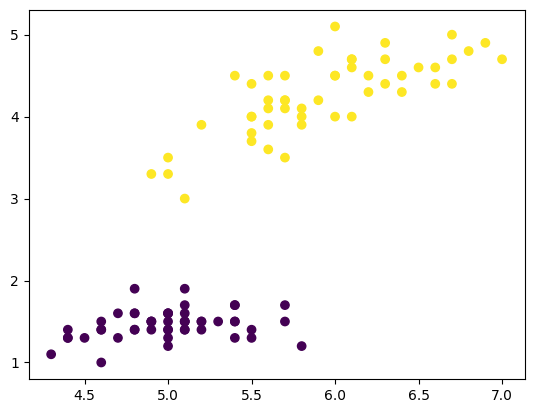

In [161]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

2. Train the algorithm

In [162]:
clf = LogisticRegressionGD()
clf.train(X, y)

In [163]:
# From https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/

import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

3. Plot the Logistic cost per epoch of training

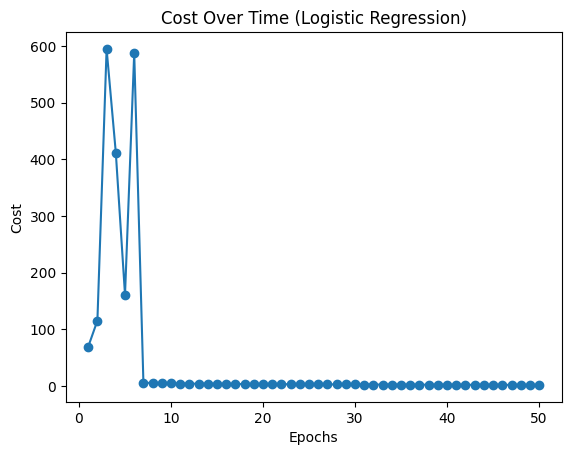

In [164]:
import matplotlib.pyplot as plt

# Plot the cost vs epochs
plt.plot(range(1, clf.epochs + 1), clf.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Over Time (Logistic Regression)')
plt.show()

4. Plot the decision boundary using the supplied plot_decision_boundary function

(<Figure size 640x480 with 1 Axes>, <Axes: >)

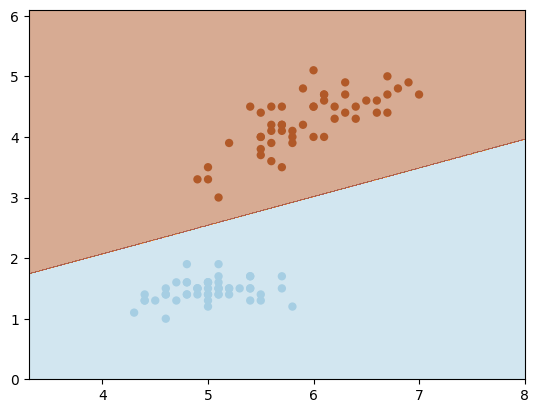

In [165]:
plot_decision_boundary(X, y, clf)

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

In [166]:
df = pd.read_csv('iris_data.csv', header=0)

label_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
y = df[' class'].map(label_mapping).values

X = df[[' petal_length', ' petal_width']].values

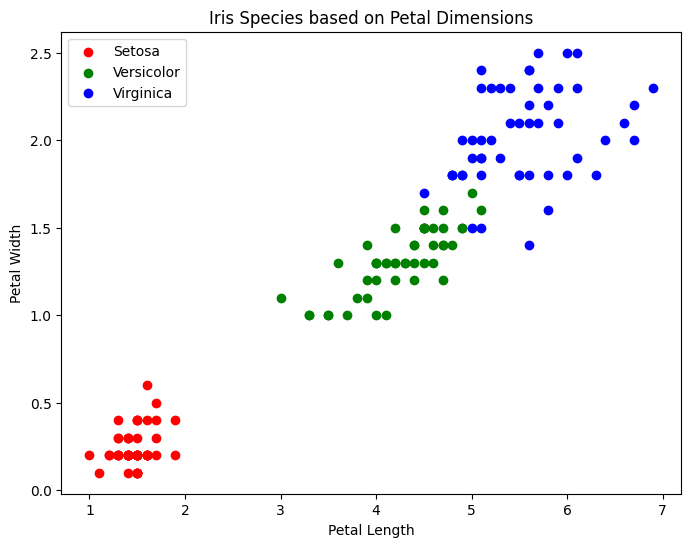

In [167]:
# Create a scatter plot for each class
plt.figure(figsize=(8, 6))

# Plot Iris-setosa (y == 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Setosa')

# Plot Iris-versicolor (y == 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Versicolor')

# Plot Iris-virginica (y == 2)
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='blue', label='Virginica')

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Species based on Petal Dimensions')
plt.legend()

# Show the plot
plt.show()

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [169]:
"""
 fitting the scaler on the training set to avoid data leakage,
 ensuring the model doesn’t get any information from the test data during training.
 Then, we use the same scaling to transform both training and test sets,
 keeping the data consistent and making sure the model generalizes well to new, unseen data.
"""
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data (INFO: I am using transform, not fit_transform)
X_test_scaled = scaler.transform(X_test)

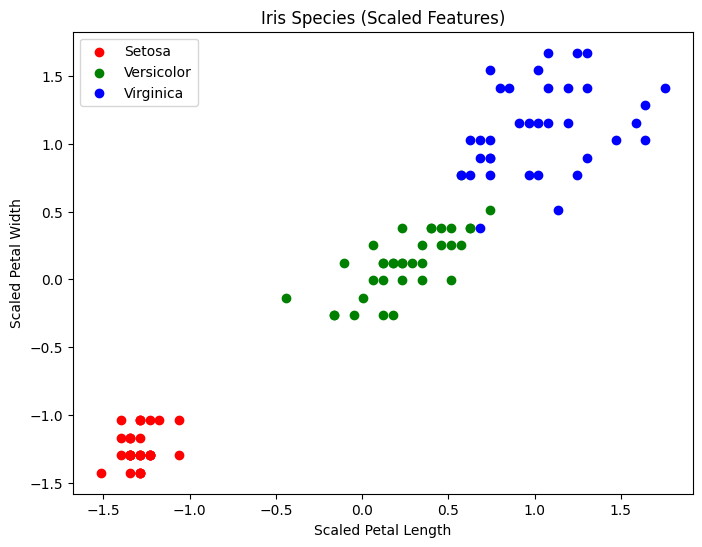

In [170]:
# Create a scatter plot for each class based on the scaled training data
plt.figure(figsize=(8, 6))

# Plot Iris-setosa (y == 0)
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], color='red', label='Setosa')

# Plot Iris-versicolor (y == 1)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], color='green', label='Versicolor')

# Plot Iris-virginica (y == 2)
plt.scatter(X_train_scaled[y_train == 2, 0], X_train_scaled[y_train == 2, 1], color='blue', label='Virginica')

# Add labels and title
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.title('Iris Species (Scaled Features)')
plt.legend()

# Show the plot
plt.show()

In [171]:
from sklearn.linear_model import LogisticRegression
# Train an instance of the LogisticRegression algorithm
model = LogisticRegression()  # Create an instance with default parameters
model.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data

LogisticRegression()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

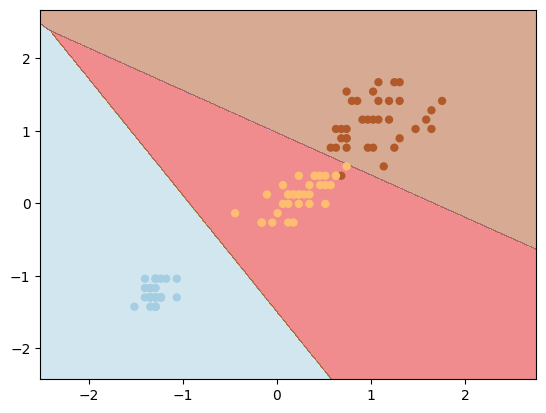

In [172]:
plot_decision_boundary(X_train_scaled, y_train, model)

In [173]:
from sklearn.metrics import accuracy_score
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

Accuracy on test data: 0.91


In [174]:
# Train Logistic Regression with small C
model_small_C = LogisticRegression(max_iter = 100, random_state=42, C=0.01)
model_small_C.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, random_state=42)

<Figure size 600x600 with 0 Axes>

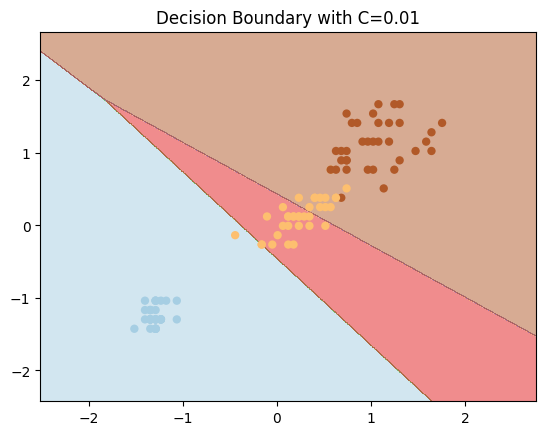

In [175]:
plt.figure(figsize=(6, 6))
plot_decision_boundary(X_train_scaled, y_train, model_small_C)
plt.title('Decision Boundary with C=0.01')
plt.show()

In [176]:
# Train Logistic Regression with large C
model_large_C = LogisticRegression(C=100)
model_large_C.fit(X_train_scaled, y_train)

LogisticRegression(C=100)

<Figure size 600x600 with 0 Axes>

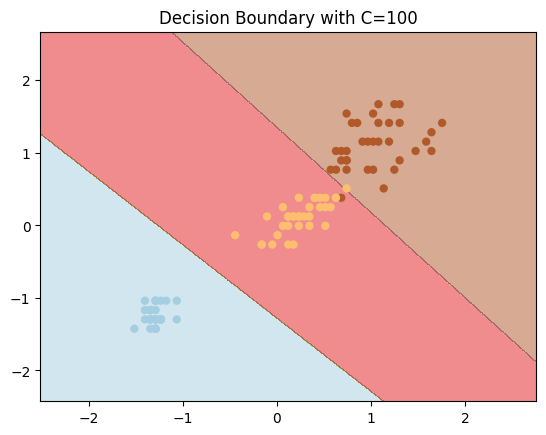

In [177]:
plt.figure(figsize=(6, 6))
plot_decision_boundary(X_train_scaled, y_train, model_large_C)
plt.title('Decision Boundary with C=100')
plt.show()

When adjusting the `C` parameter in logistic regression, which controls regularization, I noticed distinct effects on the decision boundaries. A smaller `C` value (like 0.01) increases regularization, causing the model to produce a smoother and more generalized decision boundary. This prevents the model from fitting too closely to the training data, which can help avoid overfitting but might also lead to underfitting if the model oversimplifies the patterns.

In contrast, a larger `C` value (like 100) reduces regularization, allowing the model to fit more closely to the training data. This can lead to more complex decision boundaries, which might fit the noise or specific details in the training set, resulting in overfitting. As a result, the model may perform well on the training data but generalize poorly to unseen data.

According to Goodfellow et al. (2016), regularization works by discouraging overly complex models that might overfit the training data. By penalizing large weights, regularization encourages the model to find simpler patterns, which generally leads to better generalization performance .

Reference:
Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.

In [178]:
print(f"Model with C=0.01 coefficients: {model_small_C.coef_}")
print(f"Model with C=100 coefficients: {model_large_C.coef_}")

Model with C=0.01 coefficients: [[-0.2793272  -0.26425027]
 [ 0.05870027  0.01838924]
 [ 0.22062694  0.24586103]]
Model with C=100 coefficients: [[-6.5992662  -6.10430403]
 [-1.28911091 -0.8532213 ]
 [ 7.88837711  6.95752533]]


# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

In [179]:
df = pd.read_csv('iris_data.csv', header=0)

label_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
y = df[' class'].map(label_mapping).values

X = df[[' petal_length', ' petal_width']].values

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [181]:
"""
 fitting the scaler on the training set to avoid data leakage,
 ensuring the model doesn’t get any information from the test data during training.
 Then, we use the same scaling to transform both training and test sets,
 keeping the data consistent and making sure the model generalizes well to new, unseen data.
"""
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data (INFO: I am using transform, not fit_transform)
X_test_scaled = scaler.transform(X_test)

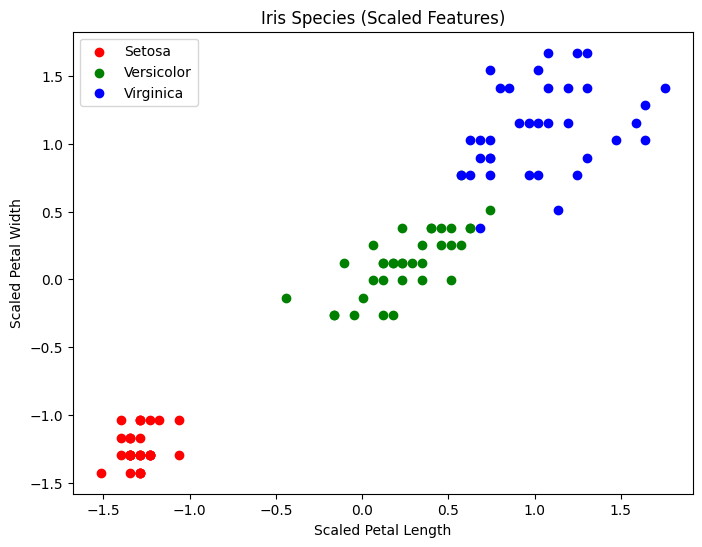

In [182]:
# Create a scatter plot for each class based on the scaled training data
plt.figure(figsize=(8, 6))

# Plot Iris-setosa (y == 0)
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], color='red', label='Setosa')

# Plot Iris-versicolor (y == 1)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], color='green', label='Versicolor')

# Plot Iris-virginica (y == 2)
plt.scatter(X_train_scaled[y_train == 2, 0], X_train_scaled[y_train == 2, 1], color='blue', label='Virginica')

# Add labels and title
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.title('Iris Species (Scaled Features)')
plt.legend()

# Show the plot
plt.show()

In [183]:
from sklearn import svm
svc_model = svm.SVC(kernel='linear')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

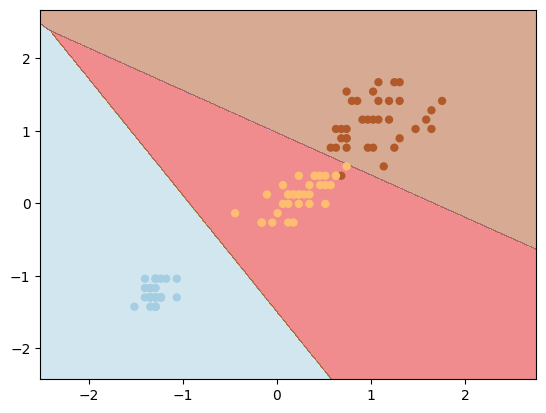

In [184]:
plot_decision_boundary(X_train_scaled, y_train, model)

In [185]:
from sklearn.metrics import accuracy_score
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

Accuracy on test data: 0.91


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

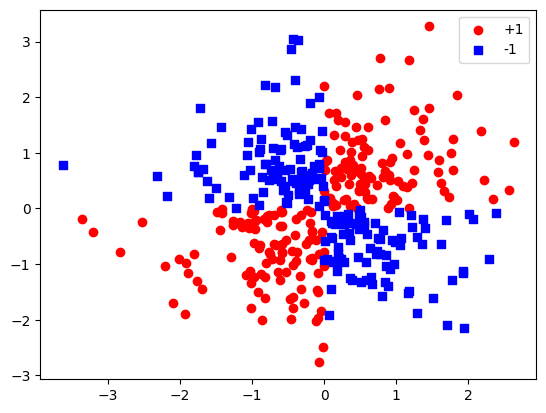

In [186]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

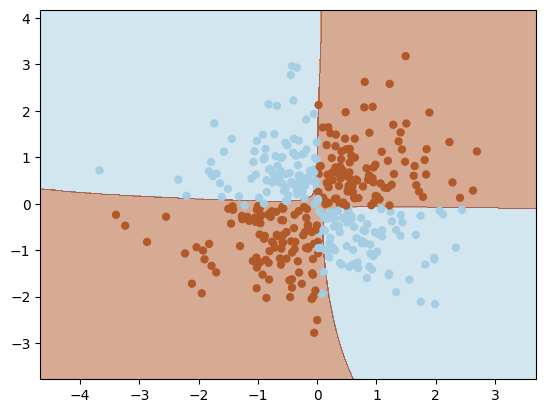

In [187]:
# Standardize the data
scaler = StandardScaler()
X_r_scaled = scaler.fit_transform(X_r)

# 1. Train an SVM model with RBF kernel and gamma=0.1
svc_rbf_low_gamma = svm.SVC(kernel='rbf', gamma=0.1)
svc_rbf_low_gamma.fit(X_r_scaled, y_r)

# 2. Plot the decision boundary for gamma=0.1
plot_decision_boundary(X_r_scaled, y_r, svc_rbf_low_gamma)

In [188]:
# 3. Print the accuracy score
y_pred_low_gamma = svc_rbf_low_gamma.predict(X_r_scaled)
print(f"Accuracy with gamma=0.1: {accuracy_score(y_r, y_pred_low_gamma)}")

Accuracy with gamma=0.1: 0.9625


(<Figure size 640x480 with 1 Axes>, <Axes: >)

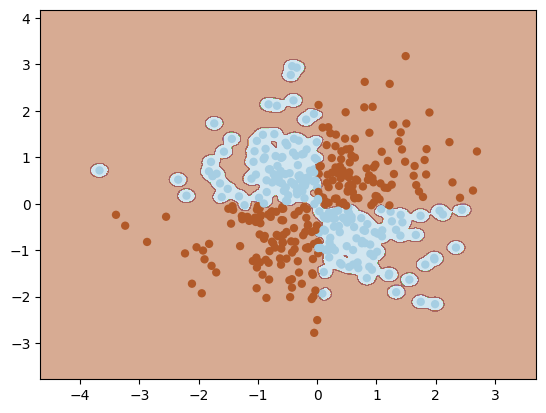

In [189]:
# 4. Train an SVM model with RBF kernel and gamma=100
svc_rbf_high_gamma = svm.SVC(kernel='rbf', gamma=100)
svc_rbf_high_gamma.fit(X_r_scaled, y_r)

# 5. Plot the decision boundary for gamma=100
plot_decision_boundary(X_r_scaled, y_r, svc_rbf_high_gamma)

In [190]:
y_pred_high_gamma = svc_rbf_high_gamma.predict(X_r_scaled)
print(f"Accuracy with gamma=100: {accuracy_score(y_r, y_pred_high_gamma)}")

Accuracy with gamma=100: 1.0


When the gamma value is increased to 100, the model becomes highly sensitive to individual data points, causing the decision boundary to become extremely tight around them. This leads to overfitting, where the model captures noise and specific details in the training data rather than the underlying patterns. As a result, while the accuracy on the training set might be high, the model is likely to perform poorly on unseen data because it lacks generalization. This is the main issue with using a high gamma value in SVM.

In [193]:
svc_rbf_low_gamma = svm.SVC(kernel='rbf', gamma=0.1)
svc_rbf_low_gamma.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

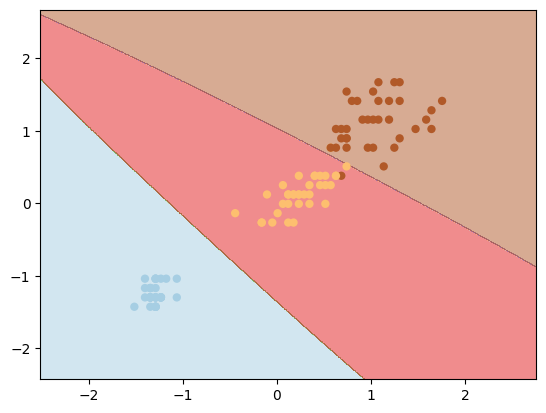

In [195]:
plot_decision_boundary(X_train_scaled, y_train, svc_rbf_low_gamma)

In [196]:
svc_rbf_high_gamma = svm.SVC(kernel='rbf', gamma=100)
svc_rbf_high_gamma.fit(X_train_scaled, y_train)

SVC(gamma=100)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

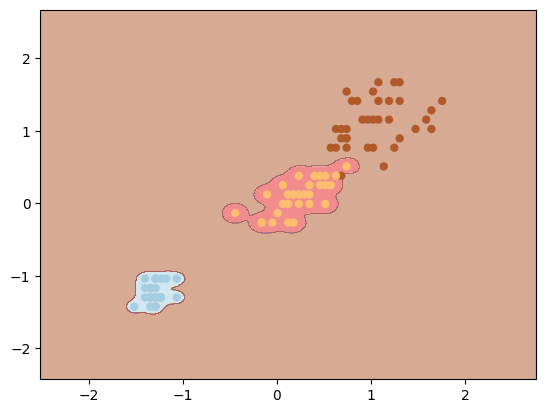

In [198]:
plot_decision_boundary(X_train_scaled, y_train, svc_rbf_high_gamma)